# RaviEdla Linear Regression Assignment
# Geely Auto car pricing market survey

## Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

## Business Goal:
    
To understand how exactly the prices can vary with independent variables, accordingly the company would manipulate the design of the cars, the business strategy and so-on, to meet certain price levels. 

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the carPrice dataset

In [1]:
##Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)
Geely_Cars = pd.read_csv(r'./CarPrice_Assignment.csv')
Geely_Cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
##Data Dimension or Data count in Rows and Columns

Geely_Cars.shape

(205, 26)

In [4]:
##check datatype of each column and missing values if present
Geely_Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
# Understand the value range of each columns their mean, SD, percentiles etc;
Geely_Cars.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Cleaning of Data

#### Splitting of data for the attribute CarName which comprises of two parts. 
The first word is the name of 'car company' and the second is the 'car model'.

In [6]:
#Splitting company name from CarName column
Geely_Cars['company'] =Geely_Cars['CarName'].str.split(' ').str[0]
Geely_Cars['company'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: company, dtype: object

In [7]:
Geely_Cars['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

## Spelling error
We see that some spelling errors in the CompanyName column data.
Ex: maxda = mazda, Nissan = nissan, porsche = porcshce, toyota = toyouta etc;

In [8]:
Geely_Cars['company'] = Geely_Cars['company'].str.replace('maxda', 'mazda')
Geely_Cars['company'] = Geely_Cars['company'].str.replace('Nissan', 'nissan')
Geely_Cars['company'] = Geely_Cars['company'].str.replace('porcshce', 'porsche')
Geely_Cars['company'] = Geely_Cars['company'].str.replace('toyouta', 'toyota')
Geely_Cars['company'] = Geely_Cars['company'].str.replace('vokswagen', 'volkswagen')
Geely_Cars['company'] = Geely_Cars['company'].str.replace('vw', 'volkswagen')
Geely_Cars['drivewheel'] = Geely_Cars['drivewheel'].str.replace('4wd', 'fwd')

In [9]:
Geely_Cars['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#Checking for duplicates in any
Geely_Cars.loc[Geely_Cars.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company


In [11]:
Geely_Cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company              object
dtype: object

In [12]:
# coverting symboling to object since it has two category
Geely_Cars['symboling'] = Geely_Cars['symboling'].astype(object) 

## Step 3: Visualising the Data

#### Data Visualisation helps in identifying if there is any multicollinearity present in the data. 
#### It is the first place to catch and identify if there are any predictors that directly have a strong association with the outcome variable.

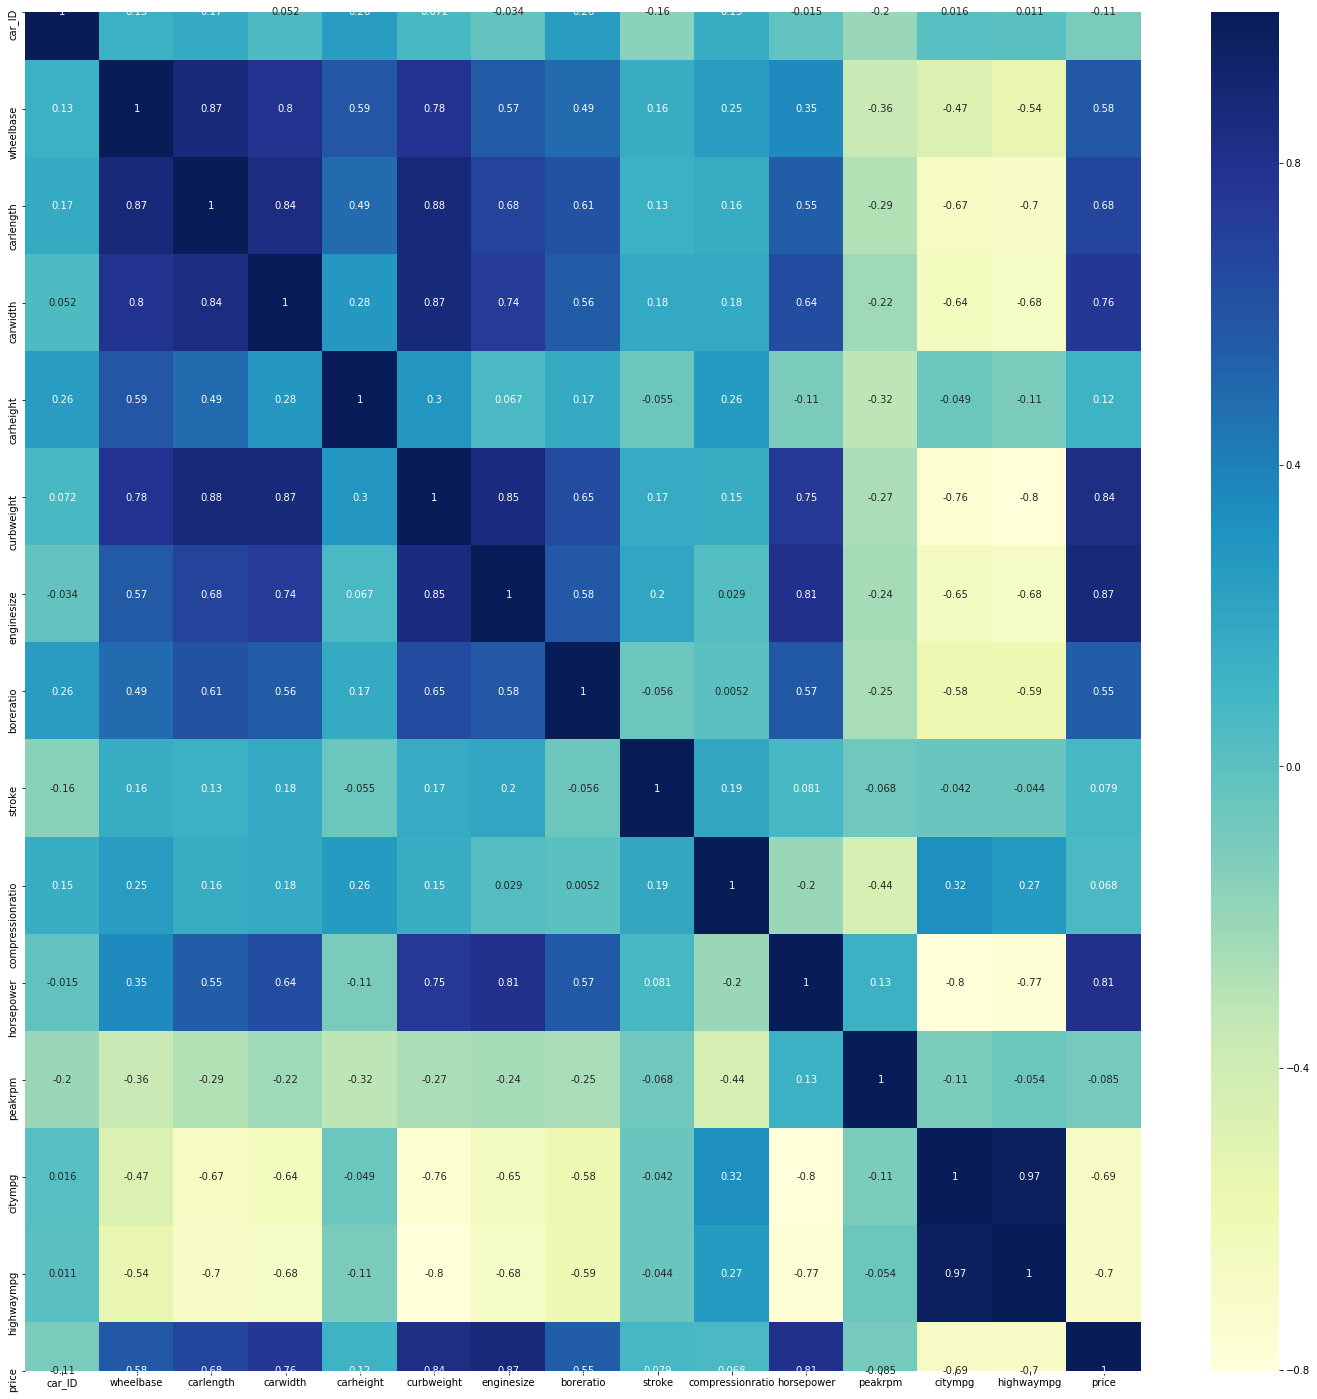

In [13]:
plt.figure(figsize=(25,25))
sns.heatmap(Geely_Cars.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [14]:
Geely_Cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Creating Dummy variables

In [15]:
symboling_Dmy = pd.get_dummies(Geely_Cars['symboling'].astype("category"),prefix='symb',drop_first=True)
company_Dmy = pd.get_dummies(Geely_Cars['company'],drop_first=True)
fueltype_Dmy = pd.get_dummies(Geely_Cars['fueltype'],prefix='fueltype',drop_first=True)
aspiration_Dmy = pd.get_dummies(Geely_Cars['aspiration'],prefix='asp',drop_first=True)
doornumber_Dmy = pd.get_dummies(Geely_Cars['doornumber'],prefix='doors',drop_first=True)
carbody_Dmy = pd.get_dummies(Geely_Cars['carbody'],prefix='carbody',drop_first=True)
drivewheel_Dmy = pd.get_dummies(Geely_Cars['drivewheel'],prefix='drivewheel',drop_first=True)
enginelocation_Dmy = pd.get_dummies(Geely_Cars['enginelocation'],prefix='engloc',drop_first=True)
enginetype_Dmy = pd.get_dummies(Geely_Cars['enginetype'],prefix='engtyp',drop_first=True)
cylindernumber_Dmy = pd.get_dummies(Geely_Cars['cylindernumber'],prefix='cylnum',drop_first=True)
fuelsystem_Dmy = pd.get_dummies(Geely_Cars['fuelsystem'],prefix='fuelsys',drop_first=True)

In [16]:
Geely_Cars1 = pd.concat([company_Dmy,symboling_Dmy,fueltype_Dmy,aspiration_Dmy,doornumber_Dmy,carbody_Dmy,drivewheel_Dmy,
                           enginelocation_Dmy,Geely_Cars.wheelbase,Geely_Cars.carlength,Geely_Cars.carwidth,
                           Geely_Cars.carheight,Geely_Cars.curbweight,enginetype_Dmy,cylindernumber_Dmy,
                           Geely_Cars.enginesize,fuelsystem_Dmy,Geely_Cars.boreratio,Geely_Cars.stroke,
                           Geely_Cars.compressionratio,Geely_Cars.horsepower,Geely_Cars.peakrpm,Geely_Cars.citympg,
                           Geely_Cars.highwaympg,Geely_Cars.price], axis=1)

In [17]:
Geely_Cars1.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symb_-1,symb_0,symb_1,symb_2,symb_3,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,0,0,0,0,0,0,0,1,0,0,0,0,130,0,0,0,0,1,0,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,0,0,0,0,0,0,0,1,0,0,0,0,130,0,0,0,0,1,0,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,94.5,171.2,65.5,52.4,2823,0,0,0,0,1,0,0,0,1,0,0,0,152,0,0,0,0,1,0,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,99.8,176.6,66.2,54.3,2337,0,0,1,0,0,0,0,1,0,0,0,0,109,0,0,0,0,1,0,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,99.4,176.6,66.4,54.3,2824,0,0,1,0,0,0,1,0,0,0,0,0,136,0,0,0,0,1,0,0,3.19,3.40,8.0,115,5500,18,22,17450.0


## Splitting of data into Train and Test Sets

In [36]:
Geely_Cars_Train, Geely_Cars_Test = train_test_split(Geely_Cars1, train_size=0.7, random_state=100)

In [37]:
Geely_Cars_Train.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symb_-1,symb_0,symb_1,symb_2,symb_3,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,93.7,167.3,63.8,50.8,2191,0,0,1,0,0,0,0,1,0,0,0,0,98,1,0,0,0,0,0,0,2.97,3.23,9.4,68,5500,31,38,7609.0
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,94.5,168.9,68.3,50.2,2778,0,0,1,0,0,0,0,1,0,0,0,0,151,0,0,0,0,1,0,0,3.94,3.11,9.5,143,5500,19,27,22018.0
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,94.5,168.7,64.0,52.6,2300,0,0,0,0,0,0,0,1,0,0,0,0,98,0,0,0,0,1,0,0,3.24,3.08,9.4,112,6600,26,29,9538.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,88.6,168.8,64.1,48.8,2548,0,0,0,0,0,0,0,1,0,0,0,0,130,0,0,0,0,1,0,0,3.47,2.68,9.0,111,5000,21,27,16500.0
199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,104.3,188.8,67.2,57.5,3157,0,0,1,0,0,0,0,1,0,0,0,0,130,0,0,0,0,1,0,0,3.62,3.15,7.5,162,5100,17,22,18950.0


In [38]:
Geely_Cars_Train.shape

(143, 68)

In [39]:
Geely_Cars_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 68 columns):
audi                 143 non-null uint8
bmw                  143 non-null uint8
buick                143 non-null uint8
chevrolet            143 non-null uint8
dodge                143 non-null uint8
honda                143 non-null uint8
isuzu                143 non-null uint8
jaguar               143 non-null uint8
mazda                143 non-null uint8
mercury              143 non-null uint8
mitsubishi           143 non-null uint8
nissan               143 non-null uint8
peugeot              143 non-null uint8
plymouth             143 non-null uint8
porsche              143 non-null uint8
renault              143 non-null uint8
saab                 143 non-null uint8
subaru               143 non-null uint8
toyota               143 non-null uint8
volkswagen           143 non-null uint8
volvo                143 non-null uint8
symb_-1              143 non-null uint8
symb_0         

## Scaling the Features using MinMaxScaler()

In [40]:
scaler = MinMaxScaler()
specslist = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
             'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

Geely_Cars_Train[specslist] = scaler.fit_transform(Geely_Cars_Train[specslist])
Geely_Cars_Train[specslist].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


In [41]:
Geely_Cars_Train.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symb_-1,symb_0,symb_1,symb_2,symb_3,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0,0,1,0,0,0,0,1,0,0,0,0,0.139623,1,0,0,0,0,0,0,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,0,0,1,0,0,0,0,1,0,0,0,0,0.339623,0,0,0,0,1,0,0,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,0,0,0,0,0,0,0,1,0,0,0,0,0.139623,0,0,0,0,1,0,0,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,0,0,0,0,0,0,0,1,0,0,0,0,0.260377,0,0,0,0,1,0,0,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0,0,1,0,0,0,0,1,0,0,0,0,0.260377,0,0,0,0,1,0,0,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


##### Dividing into X and Y sets for the model building

In [24]:
#Dividing into X and Y
y_train = Geely_Cars_Train.pop('price')
X_train = Geely_Cars_Train

# Building our model

In [25]:
X_train.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symb_-1,symb_0,symb_1,symb_2,symb_3,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
122,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0,0,1,0,0,0,0,1,0,0,0,0,0.139623,1,0,0,0,0,0,0,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,0,0,1,0,0,0,0,1,0,0,0,0,0.339623,0,0,0,0,1,0,0,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270
166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,0,0,0,0,0,0,0,1,0,0,0,0,0.139623,0,0,0,0,1,0,0,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,0,0,0,0,0,0,0,1,0,0,0,0,0.260377,0,0,0,0,1,0,0,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270
199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0,0,1,0,0,0,0,1,0,0,0,0,0.260377,0,0,0,0,1,0,0,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135


In [26]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

## RFE (Recursive feature elimination) to eliminate insignificant columns

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('audi', False, 25),
 ('bmw', True, 1),
 ('buick', False, 33),
 ('chevrolet', False, 12),
 ('dodge', False, 7),
 ('honda', False, 10),
 ('isuzu', False, 34),
 ('jaguar', False, 16),
 ('mazda', False, 29),
 ('mercury', False, 46),
 ('mitsubishi', True, 1),
 ('nissan', False, 31),
 ('peugeot', True, 1),
 ('plymouth', False, 6),
 ('porsche', True, 1),
 ('renault', False, 42),
 ('saab', False, 4),
 ('subaru', False, 40),
 ('toyota', False, 32),
 ('volkswagen', False, 30),
 ('volvo', False, 8),
 ('symb_-1', False, 26),
 ('symb_0', False, 36),
 ('symb_1', False, 38),
 ('symb_2', False, 37),
 ('symb_3', False, 39),
 ('fueltype_gas', False, 13),
 ('asp_turbo', False, 2),
 ('doors_two', False, 41),
 ('carbody_hardtop', False, 20),
 ('carbody_hatchback', False, 19),
 ('carbody_sedan', False, 21),
 ('carbody_wagon', False, 22),
 ('drivewheel_rwd', False, 28),
 ('engloc_rear', True, 1),
 ('wheelbase', False, 3),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbwe

In [57]:
cols = X_train.columns[(rfe.ranking_ == 1) & (rfe.support_ == True)]
cols

Index(['bmw', 'mitsubishi', 'peugeot', 'porsche', 'engloc_rear', 'carwidth',
       'curbweight', 'engtyp_dohcv', 'engtyp_l', 'engtyp_rotor', 'cylnum_five',
       'cylnum_four', 'cylnum_three', 'cylnum_twelve', 'cylnum_two',
       'enginesize', 'boreratio', 'stroke', 'horsepower', 'peakrpm'],
      dtype='object')

In [58]:
X_train.columns[~((rfe.ranking_ == 1) & (rfe.support_ == True))]

Index(['audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'nissan', 'plymouth', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'symb_-1', 'symb_0', 'symb_1',
       'symb_2', 'symb_3', 'fueltype_gas', 'asp_turbo', 'doors_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_rwd', 'wheelbase', 'carlength',
       'carheight', 'engtyp_ohc', 'engtyp_ohcf', 'engtyp_ohcv', 'cylnum_six',
       'fuelsys_2bbl', 'fuelsys_4bbl', 'fuelsys_idi', 'fuelsys_mfi',
       'fuelsys_mpfi', 'fuelsys_spdi', 'fuelsys_spfi', 'compressionratio',
       'citympg', 'highwaympg'],
      dtype='object')

# Building model using statsmodel
### Optimizing the Model using Statsmodel for statistical analysis i.e. manual feature elimination
### We will analyse VIF and p-value for each feature at each stage and remove unnecessary features as per the analysis

#### Process for removing features are:
- Whether the feature is relevant for business users even if seriously significant
- High VIF and high p-value will be removed
- High p-value will be removed first in cases we find combination of high/low p-value/VIF
- Low p-value and low VIF to be kept for model building

In [59]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [60]:
#Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)

# Fitting the model
lr = sm.OLS(y_train, X_train_rfe_sm)
lr_model = lr.fit() # Running the linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     118.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.74e-69
Time:                        02:56:31   Log-Likelihood:                 224.63
No. Observations:                 143   AIC:                            -411.3
Df Residuals:                     124   BIC:                            -355.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3335      0.041     -8.133

#### We can see from the above summary that p-value of "engtyp_dohcv" is very high, so we will drop this feature and build the model again with remaining features.

In [69]:
X_train_new = X_train_rfe_sm.drop(["engtyp_dohcv"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.29e-70
Time:                        03:01:25   Log-Likelihood:                 224.62
No. Observations:                 143   AIC:                            -413.2
Df Residuals:                     125   BIC:                            -359.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3331      0.041     -8.183

#### We can see in the above summary that p-value of "peakrpm" is very high, so we will drop this feature and build the model again with remaining features.

In [70]:
X_train_new = X_train_new.drop(["peakrpm"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.41e-71
Time:                        03:01:40   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3216      0.039     -8.265

#### We can see in the above summary that p-value of "horsepower" is relatively high, we will also analyse the VIF for the current model and find any features which are co-dependent.

In [71]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,engtyp_rotor,inf
8,engtyp_l,inf
14,cylnum_two,inf
3,peugeot,inf
12,cylnum_three,inf
0,const,74.82
15,enginesize,27.58
11,cylnum_four,15.39
7,curbweight,12.19
6,carwidth,6.06


#### We can see that there are many variables which are co-dependent on each other, i.e. their VIF is very high.
#### Acceptable values of VIF are below 10 when the model is lenient.
#### We will now remove the features having very high VIF values one by one and keep checking the p-values and VIF values till the model is optimised.

In [73]:
X_train_new = X_train_new.drop(["peugeot"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.41e-71
Time:                        03:05:20   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3216      0.039     -8.265

In [74]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,engtyp_rotor,inf
13,cylnum_two,inf
0,const,74.82
14,enginesize,27.58
10,cylnum_four,15.39
6,curbweight,12.19
5,carwidth,6.06
17,horsepower,5.90
15,boreratio,5.88
12,cylnum_twelve,3.31


In [76]:
X_train_new = X_train_new.drop(["cylnum_two"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.41e-71
Time:                        03:06:16   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3216      0.039     -8.265

In [77]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,74.82
13,enginesize,27.58
10,cylnum_four,15.39
6,curbweight,12.19
5,carwidth,6.06
16,horsepower,5.90
14,boreratio,5.88
8,engtyp_rotor,5.62
12,cylnum_twelve,3.31
9,cylnum_five,3.17


In [78]:
X_train_new = X_train_new.drop(["const"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.41e-71
Time:                        03:06:54   Log-Likelihood:                 224.09
No. Observations:                 143   AIC:                            -414.2
Df Residuals:                     126   BIC:                            -363.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3216      0.039     -8.265

In [79]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,enginesize,81.20
5,curbweight,57.85
4,carwidth,41.77
13,boreratio,34.90
14,stroke,31.61
9,cylnum_four,25.03
15,horsepower,15.29
7,engtyp_rotor,3.96
11,cylnum_twelve,2.91
8,cylnum_five,2.76


In [80]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     90.54
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.50e-60
Time:                        03:07:24   Log-Likelihood:                 192.77
No. Observations:                 143   AIC:                            -353.5
Df Residuals:                     127   BIC:                            -306.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1972      0.045     -4.428

In [82]:
## As we can see that this model has very high p-values for some features, we need to drop these
X_train_new = X_train_new.drop(["cylnum_five"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     97.75
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.50e-61
Time:                        03:08:06   Log-Likelihood:                 192.76
No. Observations:                 143   AIC:                            -355.5
Df Residuals:                     128   BIC:                            -311.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1957      0.043     -4.565

In [83]:
## As we can see that this model has very high p-values for some features, we need to drop these
X_train_new = X_train_new.drop(["stroke"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     106.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.55e-62
Time:                        03:08:34   Log-Likelihood:                 192.69
No. Observations:                 143   AIC:                            -357.4
Df Residuals:                     129   BIC:                            -315.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2007      0.040     -4.965

In [85]:
## As we can see that this model has very high p-values for some features, we need to drop these
X_train_new = X_train_new.drop(["cylnum_four"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     115.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.11e-63
Time:                        03:09:01   Log-Likelihood:                 192.42
No. Observations:                 143   AIC:                            -358.8
Df Residuals:                     130   BIC:                            -320.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1759      0.019     -9.185

In [87]:
## As we can see that this model has very high p-values for some features, we need to drop these
X_train_new = X_train_new.drop(["engtyp_rotor"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     125.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.15e-64
Time:                        03:09:39   Log-Likelihood:                 191.65
No. Observations:                 143   AIC:                            -359.3
Df Residuals:                     131   BIC:                            -323.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1753      0.019     -9.144

In [88]:
## As we can see that this model has very high p-values for some features, we need to drop these
X_train_new = X_train_new.drop(["horsepower"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.86e-64
Time:                        03:09:52   Log-Likelihood:                 190.40
No. Observations:                 143   AIC:                            -358.8
Df Residuals:                     132   BIC:                            -326.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1776      0.019     -9.246

In [90]:
## As we can see that this model has very high p-values for some features, we need to drop these
X_train_new = X_train_new.drop(["mitsubishi"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.09e-64
Time:                        03:10:15   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1826      0.019     -9.475

In [91]:
# Now we have acceptable p-values for each feature so we can again start analysing the VIF for these features 
# to get an acceptable model

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,carwidth,25.25
4,curbweight,23.05
8,boreratio,9.73
1,porsche,1.64
2,engloc_rear,1.57
5,engtyp_l,1.32
6,cylnum_three,1.15
0,bmw,1.12
7,cylnum_twelve,1.07


In [92]:
## As we can see that this model has very high VIF for some features, we need to drop these
X_train_new = X_train_new.drop(["carwidth"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     133.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.28e-60
Time:                        03:10:59   Log-Likelihood:                 173.88
No. Observations:                 143   AIC:                            -329.8
Df Residuals:                     134   BIC:                            -303.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1258      0.018     -7.053

In [93]:
## As we can see that this model has high p-values for some features, we need to drop these
X_train_new = X_train_new.drop(["boreratio"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.97e-60
Time:                        03:11:12   Log-Likelihood:                 172.21
No. Observations:                 143   AIC:                            -328.4
Df Residuals:                     135   BIC:                            -304.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1449      0.014    -10.087

In [94]:
# Now we have acceptable p-values for each feature so we can again start analysing the VIF for these features 
# to get an acceptable model

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,porsche,1.55
2,engloc_rear,1.50
3,curbweight,1.33
4,engtyp_l,1.31
5,cylnum_three,1.15
0,bmw,1.09
6,cylnum_twelve,1.04


### For the current model the p-values and VIF of all the features are falling in acceptable range. 
### Also the values of R-Squared and Adjusted R-Squared are very close, hence we can accept this model provided that the MLR assumptions also get satisfied.

#### Checking the assumptions of MLR for this model (Residual Analysis)

In [96]:
y_train_price_lm = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

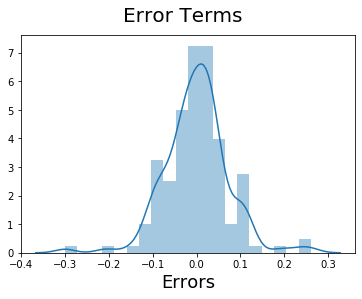

In [104]:
fig = plt.figure()
sns.distplot((y_train-y_train_price_lm), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### We can see from the above graph that the error terms are normally distributed. Hence, our model can be accepted as it follows the normal assumptions of Linear Regression.

## Making Predictions

### Applying Scaling on the Test set

In [108]:
cols_to_scale = ['wheelbase','carlength','carwidth','carheight',
                 'curbweight','enginesize','boreratio','stroke',
                 'compressionratio','horsepower','peakrpm','citympg',
                 'highwaympg','price']
Geely_Cars_Test[cols_to_scale] = scaler.transform(Geely_Cars_Test[cols_to_scale])
Geely_Cars_Test.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,symb_-1,symb_0,symb_1,symb_2,symb_3,fueltype_gas,asp_turbo,doors_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,engloc_rear,wheelbase,carlength,carwidth,carheight,curbweight,engtyp_dohcv,engtyp_l,engtyp_ohc,engtyp_ohcf,engtyp_ohcv,engtyp_rotor,cylnum_five,cylnum_four,cylnum_six,cylnum_three,cylnum_twelve,cylnum_two,enginesize,fuelsys_2bbl,fuelsys_4bbl,fuelsys_idi,fuelsys_mfi,fuelsys_mpfi,fuelsys_spdi,fuelsys_spfi,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0.313793,0.409756,0.341667,0.460177,0.235066,0,0,1,0,0,0,0,1,0,0,0,0,0.139623,1,0,0,0,0,0,0,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382
186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0.368966,0.497561,0.433333,0.699115,0.305275,0,0,1,0,0,0,0,1,0,0,0,0,0.181132,0,0,0,0,1,0,0,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295
59,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0.420690,0.596748,0.516667,0.522124,0.347944,0,0,1,0,0,0,0,1,0,0,0,0,0.230189,1,0,0,0,0,0,0,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964
165,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0.272414,0.448780,0.308333,0.424779,0.301396,0,0,0,0,0,0,0,1,0,0,0,0,0.139623,0,0,0,0,1,0,0,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479
140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0.231034,0.263415,0.291667,0.699115,0.291699,0,0,0,1,0,0,0,1,0,0,0,0,0.177358,1,0,0,0,0,0,0,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652


In [110]:
# Dividing into X and y in test set
y_test = Geely_Cars_Test.pop('price')
X_test = Geely_Cars_Test

In [111]:
# using only the columns present in Training dataset
X_test_new = X_test[X_train_new.columns]
# adding constant to test dataset
X_test_new = sm.add_constant(X_test_new)

In [112]:
# Making Predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation (Testing the model for Suitability)

Text(0, 0.5, 'y_pred')

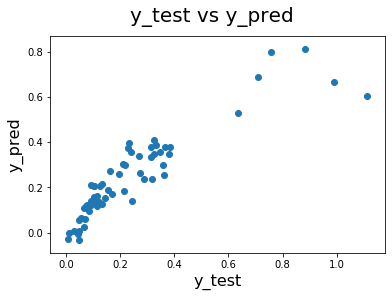

In [113]:
# Plotting y_test and y_pred to test the model's reliability by analysing the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### As shown in the above graph plot the y_pred and y_test are linearly correlated, which means that the model is appropriate.

### Calculate the R-Squared Value for the test dataset to verify the accuracy of the model.

In [114]:
# Calculating the R-Square value for test dataset
r2_score_val = r2_score(y_test, y_pred)
print('R-Squared of Test Data : ' + str(round(r2_score_val,3)))
print('R-Squared of Linear Model : ' + str(round(lm.rsquared,3)))
print('Adjusted R-Squared of Linear Model : ' + str(round(lm.rsquared_adj,3)))

R-Squared of Test Data : 0.815
R-Squared of Linear Model : 0.886
Adjusted R-Squared of Linear Model : 0.88


#### Therefore, as shown above we note that the values of R-Square and Adjusted R-Square for Linear Model are very close, which mean that the model is acceptable.
#### We also note that the R-Square for the Test data is close to the R-Square of Linear Model which means that the predictions will be appropriate.